In [200]:
from tensorflow import keras

In [89]:
import tensorflow

In [90]:
from keras.models import Model,Sequential
from keras.layers import InputLayer,MaxPool2D,Dense,Dropout,BatchNormalization,AveragePooling2D,Flatten,Conv2D
import warnings
warnings.filterwarnings("ignore")
from keras.preprocessing.image import ImageDataGenerator

In [91]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [92]:
import os
import cv2
import random
import matplotlib.pyplot as plt

In [93]:
path = r"C:\Users\Abinay Rachakonda\Desktop\Age Detection - Face Recognition Dataset\Age Detection - Face Recognition Dataset"

In [ ]:
for folder in os.listdir(path):
    for subfolder in os.listdir(f'{path}/{folder}'):
        Images = []
        for files in os.listdir(f'{path}/{folder}/{subfolder}'):
                             Images.append(files)
        print(folder,"\t",subfolder,"\t",len(Images))
        print()
        list_images = random.sample(range(1,len(Images)),4)
        print(f"sample Images in {folder} for{subfolder}")
        print()
        for i in range(1,4):
            fig = plt.figure(figsize=(12,12))
            for j in range(1,4):
                plt.subplot(i,4,i)
                img = cv2.imread(f'{path}/{folder}/{subfolder}/{Images[list_images[i]]}')
                img =cv2.resize(img,(224,224))
                plt.imshow(img)
            plt.show() 

test 	 18-20 	 5

sample Images in test for18-20



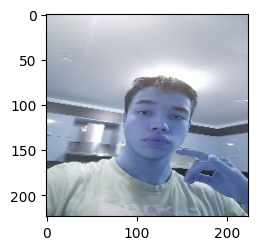

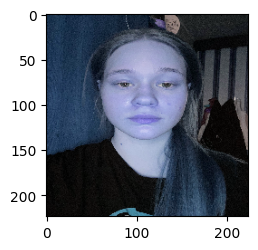

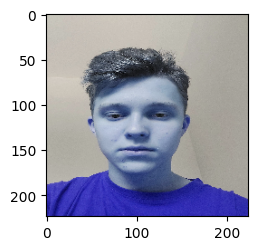

test 	 21-30 	 5

sample Images in test for21-30



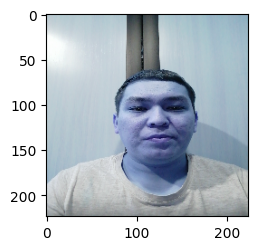

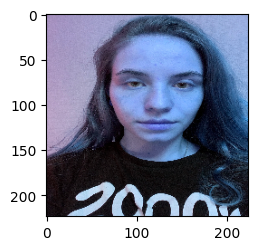

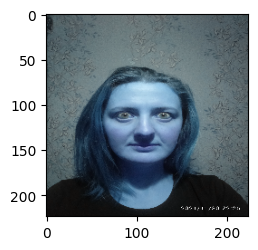

test 	 31-40 	 5

sample Images in test for31-40



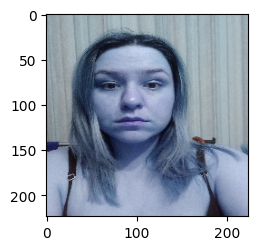

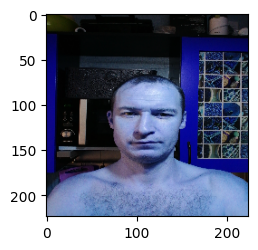

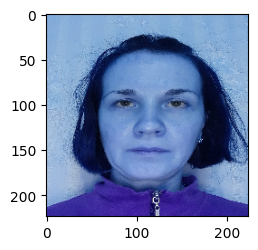

test 	 41-50 	 5

sample Images in test for41-50



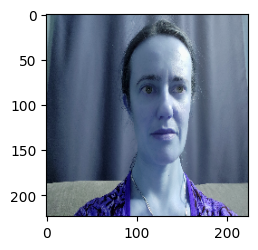

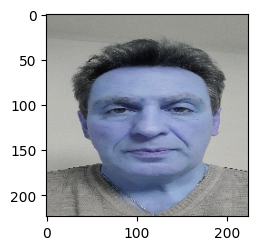

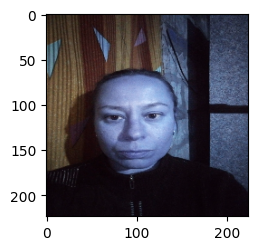

test 	 51-60 	 5

sample Images in test for51-60



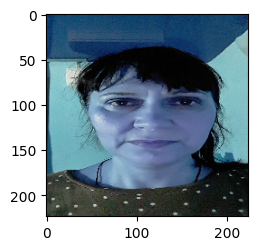

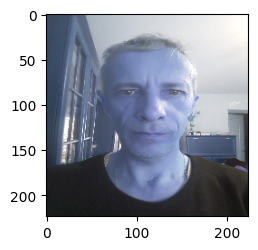

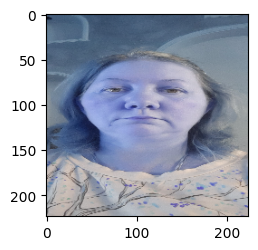

train 	 18-20 	 25

sample Images in train for18-20



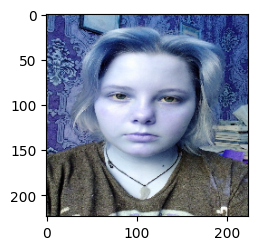

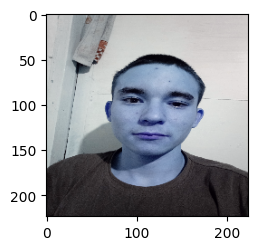

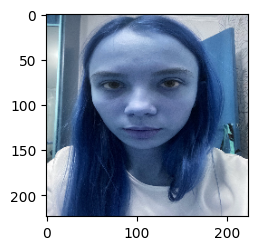

train 	 21-30 	 25

sample Images in train for21-30



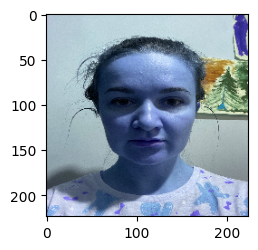

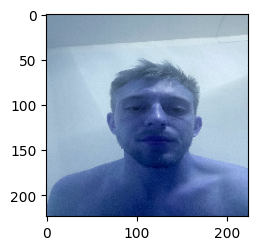

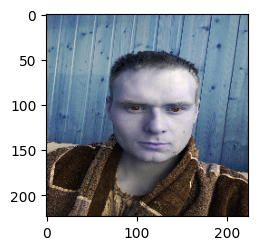

train 	 31-40 	 25

sample Images in train for31-40



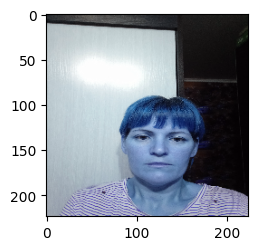

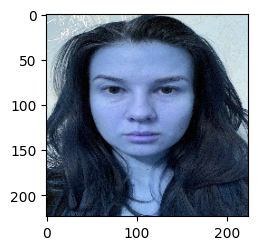

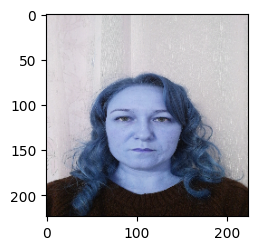

train 	 41-50 	 25

sample Images in train for41-50



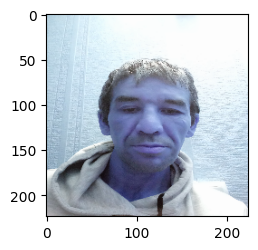

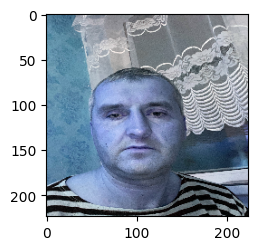

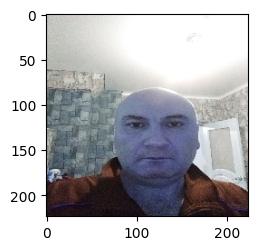

train 	 51-60 	 25

sample Images in train for51-60



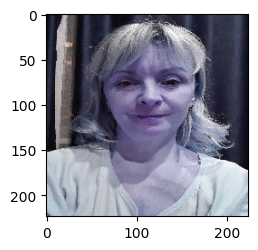

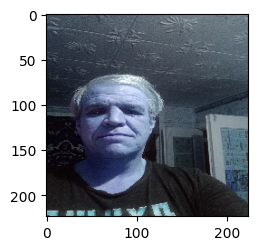

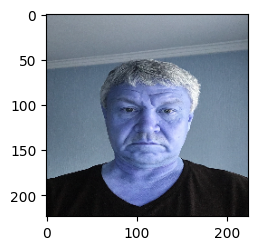

In [12]:
for folder in os.listdir(path):
    for subfolder in os.listdir(f'{path}/{folder}'):
        Images = []
        for files in os.listdir(f'{path}/{folder}/{subfolder}'):
                             Images.append(files)
        print(folder,"\t",subfolder,"\t",len(Images))
        print()
        list_images = random.sample(range(1,len(Images)),4)
        print(f"sample Images in {folder} for{subfolder}")
        print()
        for i in range(1,4):
            fig = plt.figure(figsize=(12,12))
            for j in range(1,4):
                plt.subplot(i,4,i)
                img = cv2.imread(f'{path}/{folder}/{subfolder}/{Images[list_images[i]]}')
                img =cv2.resize(img,(224,224))
                plt.imshow(img)
            plt.show() 

In [13]:
Images

['0.jpg',
 '1.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '2.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '24.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg']

In [94]:
from keras.applications.mobilenet import MobileNet

In [95]:
model = MobileNet(include_top=False,weights="imagenet",input_shape=(244,244,3),classes=5,classifier_activation="softmax")

In [96]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 122, 122, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 122, 122, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 122, 122, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 122, 122, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 122, 122, 32)     128       
 ation)                                         

In [97]:
model.layers[5]

In [98]:
for layer in model.layers:
    if "conv_dw_13" not in layer.name and "conv_dw_13"not in layer.name:
        layer.trainable = False
    else:
        layer.trainable = True
print(layer.name,layer.trainable)       

conv_pw_13_relu False


In [99]:
layer.name

'conv_pw_13_relu'

In [100]:
input = model.output
input = (Flatten())(input)
hid_1 = Dense(units=1024,activation="relu")(input)
Drop_1 = Dropout(rate=0.5)(hid_1)
hid_2 = Dense(units=528,activation="relu")(Drop_1)
hid_3 = Dense(units =528 , activation="relu")(hid_2)
Drop_2 = Dropout(rate=0.2)(hid_3)
Output = Dense(units = 5 , activation="softmax")(Drop_2)

In [101]:
model = Model (inputs = model.input,outputs = Output) 

In [102]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 122, 122, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 122, 122, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 122, 122, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 122, 122, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 122, 122, 32)     128       
 ation)                                                    

In [103]:
for folder in os.listdir(path):
    print(folder)

age_detection.csv
Test
Train


In [104]:
from keras.preprocessing.image import ImageDataGenerator

Train_gen = ImageDataGenerator(rotation_range=45,width_shift_range=0.4,
    height_shift_range=0.4,
    brightness_range=[-0.2,1.5],
    shear_range=4,rescale=1./255)
Valid_gen = ImageDataGenerator(rescale=1./255)

In [165]:
final_Trian_gen = Train_gen.flow_from_directory(r"C:\Users\Abinay Rachakonda\Desktop\Age Detection - Face Recognition Dataset\Age Detection - Face Recognition Dataset\Train",
                                                target_size=(244,244),batch_size=10,class_mode="sparse")
final_Vaild_gen = Valid_gen.flow_from_directory(r"C:\Users\Abinay Rachakonda\Desktop\Age Detection - Face Recognition Dataset\Age Detection - Face Recognition Dataset\Test",
                                                target_size=(244,244),batch_size=10,class_mode="sparse")

Found 125 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [106]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,CSVLogger
from PIL import ImageFile

In [112]:
Ec = EarlyStopping(monitor="val_loss",patience=3,start_from_epoch=20,min_delta=0.00001)
Cv = CSVLogger(r"C:\Users\Abinay Rachakonda\Desktop\Age Detection - Face Recognition Dataset\Age Detection - Face Recognition Dataset\age_detection.csv",
              separator=",",append=False)

In [113]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 122, 122, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 122, 122, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 122, 122, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 122, 122, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 122, 122, 32)     128       
 ation)                                                    

In [109]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [201]:
model.fit(final_Trian_gen,steps_per_epoch=125//10,epochs=40,validation_data=final_Vaild_gen,validation_steps=25//10,callbacks=[Ec])

Epoch 1/40
12/12 [==============================] - 37s 3s/step - loss: 1.1498 - accuracy: 0.5130 - val_loss: 2.1950 - val_accuracy: 0.1500
Epoch 2/40
12/12 [==============================] - 28s 2s/step - loss: 1.4721 - accuracy: 0.3826 - val_loss: 2.1818 - val_accuracy: 0.1500
Epoch 3/40
12/12 [==============================] - 30s 3s/step - loss: 1.1389 - accuracy: 0.5043 - val_loss: 2.2233 - val_accuracy: 0.1500
Epoch 4/40
12/12 [==============================] - 29s 2s/step - loss: 1.1516 - accuracy: 0.5250 - val_loss: 2.6341 - val_accuracy: 0.1500
Epoch 5/40
12/12 [==============================] - 28s 2s/step - loss: 1.2905 - accuracy: 0.4174 - val_loss: 2.2994 - val_accuracy: 0.2500
Epoch 6/40
12/12 [==============================] - 40s 3s/step - loss: 1.2632 - accuracy: 0.4087 - val_loss: 2.0643 - val_accuracy: 0.2000
Epoch 7/40
12/12 [==============================] - 56s 5s/step - loss: 1.1458 - accuracy: 0.5130 - val_loss: 2.2456 - val_accuracy: 0.1500
Epoch 8/40
12/12 [==

In [194]:
import cv2
img_path = cv2.imread(r"C:\Users\Abinay Rachakonda\Desktop\Age Detection - Face Recognition Dataset\Age Detection - Face Recognition Dataset\Test\21-30\25.jpg")

In [195]:
import numpy as np
img_path = cv2.resize(img_path,(244,244))
img = img_path[np.newaxis]

In [196]:
img.shape

(1, 244, 244, 3)

In [197]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 90ms/step


1

In [198]:
final_Vaild_gen.class_indices

{'18-20': 0, '21-30': 1, '31-40': 2, '41-50': 3, '51-60': 4}

In [199]:
final_Trian_gen.class_indices

{'18-20': 0, '21-30': 1, '31-40': 2, '41-50': 3, '51-60': 4}